In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:02<00:00, 101MB/s] 
100% 163M/163M [00:02<00:00, 82.9MB/s]


In [ ]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3083.jpg', 'with_mask_1886.jpg', 'with_mask_829.jpg', 'with_mask_860.jpg', 'with_mask_3263.jpg']
['with_mask_3058.jpg', 'with_mask_882.jpg', 'with_mask_218.jpg', 'with_mask_2308.jpg', 'with_mask_3040.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1048.jpg', 'without_mask_3019.jpg', 'without_mask_2387.jpg', 'without_mask_866.jpg', 'without_mask_2614.jpg']
['without_mask_1963.jpg', 'without_mask_178.jpg', 'without_mask_435.jpg', 'without_mask_2392.jpg', 'without_mask_1322.jpg']


In [ ]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


In [ ]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


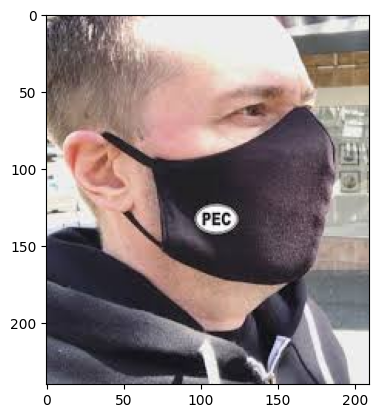

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[254, 253, 248],
        [254, 253, 248],
        [254, 253, 248],
        ...,
        [ 79,  70,  65],
        [ 68,  59,  57],
        [ 62,  54,  50]],

       [[254, 253, 248],
        [254, 253, 248],
        [254, 253, 248],
        ...,
        [ 87,  78,  72],
        [ 78,  70,  63],
        [ 70,  63,  56]],

       [[254, 253, 248],
        [254, 253, 248],
        [254, 253, 248],
        ...,
        [ 92,  84,  76],
        [ 88,  80,  72],
        [ 83,  76,  68]],

       ...,

       [[ 95, 147, 161],
        [ 81, 133, 146],
        [ 70, 121, 132],
        ...,
        [ 56, 122, 138],
        [ 55, 122, 138],
        [ 53, 120, 136]],

       [[ 57,  88, 100],
        [ 44,  75,  86],
        [ 35,  66,  76],
        ...,
        [ 58, 125, 141],
        [ 57, 124, 140],
        [ 57, 124, 140]],

       [[ 25,  40,  53],
        [ 22,  37,  49],
        [ 19,  36,  45],
        ...,
        [ 57, 124, 140],
        [ 59, 126, 142],
        [ 61, 128, 144]]], dtype=uint8)
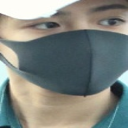

In [ ]:
X_train[0]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - acc: 0.7035 - loss: 0.6931 - val_acc: 0.9041 - val_loss: 0.2400
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8616 - loss: 0.3405 - val_acc: 0.9190 - val_loss: 0.2015
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9016 - loss: 0.2480 - val_acc: 0.9124 - val_loss: 0.2110
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9268 - loss: 0.2007 - val_acc: 0.9322 - val_loss: 0.1746
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9363 - loss: 0.1704 - val_acc: 0.9372 - val_loss: 0.1650
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9482 - loss: 0.1307 - val_acc: 0.9306 - val_loss: 0.1984
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9557 - loss: 0.1218 - val_acc: 0.9405 - val_loss: 0.1930
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9650 - loss: 0.0947 - val_acc: 0.9421 - val_loss: 0.1700
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9405 - loss: 0.2527
Test accuracy = 0.9397749900817871


Path of the image to be predicted: /content/data/with_mask/with_mask_3058.jpg


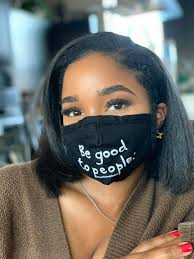

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
[[0.3477825  0.68707865]]
1
The person in the image is waring a mask.


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')

In [ ]:
model.save('C:/Users/Agash/Downloads/mask_detection_model.keras')

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("C:/Users/Agash/Downloads/mask_detection_model.keras")


def preprocess_frame(frame):
  if frame is not None:
    resized_frame = cv2.resize(frame, (128, 128))
    normalized_frame = resized_frame / 255
    input_image = np.reshape(normalized_frame, [1, 128, 128, 3])
    return input_image
  else:
    print("image not found")


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    processed_frame = preprocess_frame(frame)
    prediction = model.predict(processed_frame)
    pred_label = np.argmax(prediction)

    label = "Mask" if pred_label == 1 else "No Mask"
    color = (0, 255, 0) if pred_label == 1 else (0, 0, 255)
    cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow('Mask Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
